## Linear Regression

We will predict the real values by best fitting a straigh line on dataset 

Linear regression is a statistical method that models the relationship between a dependent variable and independent variables by fitting a straight line to the observed data. It is primarily used to predict the value of the dependent variable based on the values of the input features.

## mathematical formulas and probability theory

====

## Y = mx
# Y is Depdented on X
# X is independent variable

=====

## Installing the Requried Packages 

In [3]:
!pip install pandas scikit-learn matplotlib seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


In [5]:
import pandas as pd     
import seaborn as sns
import matplotlib.pyplot as plt

In [41]:
df=pd.read_csv("Housing.csv")

In [7]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [55]:
df.shape

(545, 13)

In [12]:
prices=df['price']
areas=df['area']

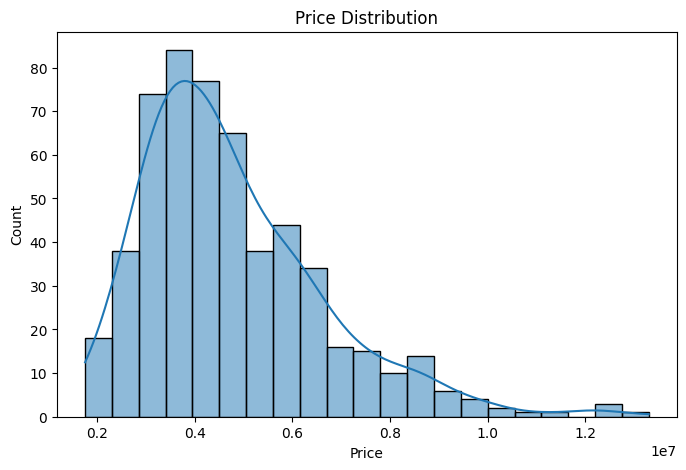

In [13]:
plt.figure(figsize=(8,5))
sns.histplot(prices, kde=True)
plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()


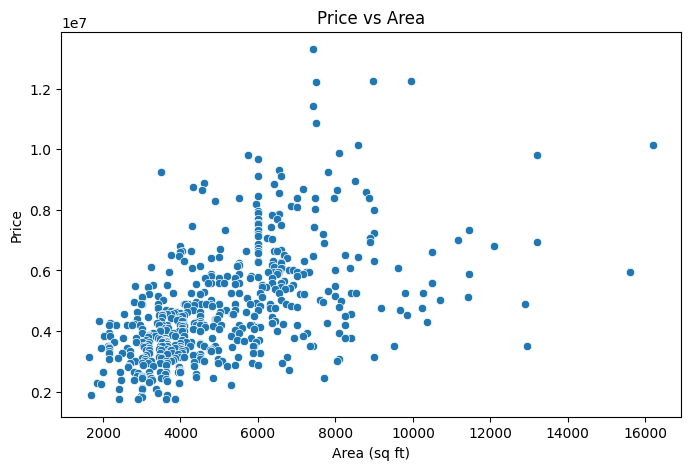

In [14]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='area', y='price', data=df)
plt.title("Price vs Area")
plt.xlabel("Area (sq ft)")
plt.ylabel("Price")
plt.show()


In [17]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


#### Label Encoding

In [42]:
from sklearn.preprocessing import LabelEncoder

# Create separate encoders
le_mainroad = LabelEncoder()
le_guestroom = LabelEncoder()
le_basement = LabelEncoder()
le_hotwaterheating = LabelEncoder()
le_airconditioning = LabelEncoder()
le_prefarea = LabelEncoder()
le_furnishingstatus = LabelEncoder()

# Apply encoding
df["mainroad"] = le_mainroad.fit_transform(df["mainroad"])
df["guestroom"] = le_guestroom.fit_transform(df["guestroom"])
df["basement"] = le_basement.fit_transform(df["basement"])
df["hotwaterheating"] = le_hotwaterheating.fit_transform(df["hotwaterheating"])
df["airconditioning"] = le_airconditioning.fit_transform(df["airconditioning"])
df["prefarea"] = le_prefarea.fit_transform(df["prefarea"])
df["furnishingstatus"] = le_furnishingstatus.fit_transform(df["furnishingstatus"])


In [24]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0


In [25]:
# Check mising values
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

#### Correlation of Prices with Other Columns , 

In [26]:
print(df.corr()["price"].sort_values(ascending=False))

# More Area higher price

price               1.000000
area                0.535997
bathrooms           0.517545
airconditioning     0.452954
stories             0.420712
parking             0.384394
bedrooms            0.366494
prefarea            0.329777
mainroad            0.296898
guestroom           0.255517
basement            0.187057
hotwaterheating     0.093073
furnishingstatus   -0.304721
Name: price, dtype: float64


## Segregating the Input and Output Columns 

In [43]:
# Features (all except 'price')
X = df.drop(["price"], axis=1)

# Target variable
y = df["price"]

## Spliting it on 80/20 Rule

In [44]:
# Linear Regression for House Price Prediction
from sklearn.model_selection import train_test_split

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## Importing and Configuring Linear Regression Model 

In [45]:
from sklearn.linear_model import LinearRegression

# Initialize and train model
model = LinearRegression()



## Training

In [ ]:

model.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


## Taking Prediction on 20% Chunk which we saved for testing

In [47]:

# Predictions
y_pred = model.predict(X_test)

In [48]:
y_pred[0:10]

array([5203691.70963178, 7257004.02115476, 3062828.59668172,
       4559591.65374424, 3332932.30559782, 3563080.67918997,
       5645466.31219972, 6413979.66873635, 2755831.54819   ,
       2668938.66075229])

## Making it Accuracy and Error Profile as per Above Predictions 

In [49]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)   # ✅ RMSE is often used in regression
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R^2 Score:", r2)
accuracy = r2 * 100
print(f"Accuracy: {accuracy:.2f}%")


Mean Absolute Error (MAE): 979679.6912959905
Mean Squared Error (MSE): 1771751116594.0347
Root Mean Squared Error (RMSE): 1331071.4167895105
R^2 Score: 0.6494754192267804
Accuracy: 64.95%


## Scatter Plotting the Actual vs Predicted Prices

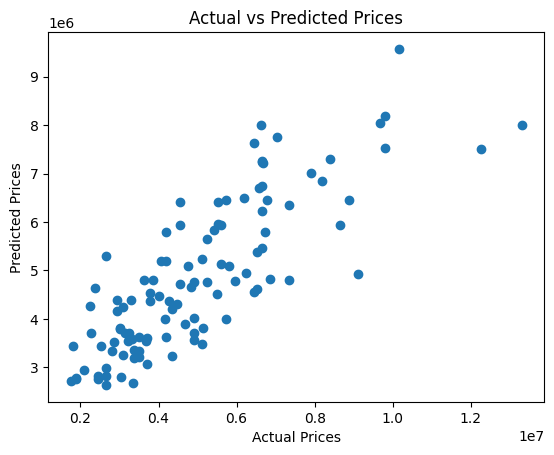

In [50]:
# Plot 
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()

In [53]:
# 1. Naya Sample Data (Wahi columns jo aapne training mein use kiye)
sample_data = {
    "area": 3000,
    "bedrooms": 3,
    "bathrooms": 2,
    "stories": 2,
    "mainroad": 'yes',
    "guestroom": "no",
    "basement": "yes",
    "hotwaterheating": "no",
    "airconditioning": "yes",
    "parking": 2,
    "prefarea": "yes",
    "furnishingstatus": "furnished"
}

sample_df = pd.DataFrame([sample_data])

# 2. Aapke apne Label Encoders use karte huay Transform karein
sample_df["mainroad"] = le_mainroad.transform(sample_df["mainroad"])
sample_df["guestroom"] = le_guestroom.transform(sample_df["guestroom"])
sample_df["basement"] = le_basement.transform(sample_df["basement"])
sample_df["hotwaterheating"] = le_hotwaterheating.transform(sample_df["hotwaterheating"])
sample_df["airconditioning"] = le_airconditioning.transform(sample_df["airconditioning"])
sample_df["prefarea"] = le_prefarea.transform(sample_df["prefarea"])
sample_df["furnishingstatus"] = le_furnishingstatus.transform(sample_df["furnishingstatus"])


# 4. Final Prediction
prediction = model.predict(sample_df)

print(f"Ghar ki Predicted Price hai: {prediction[0]:,.2f}")

Ghar ki Predicted Price hai: 6,869,982.96
